# Course 3 : Exercise 2 : BBC news archive

This week you will build on last week’s exercise where you tokenized words from the BBC news reports dataset. This dataset contains articles that are classified into a number of different categories. See if you can design a neural network that can be trained on this dataset to accurately determine what words determine what category. Create the vecs.tsv and meta.tsv files and load them into the embedding projector.

In [15]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

In [16]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
vocab_size = 1000 # YOUR CODE HERE
embedding_dim = 16 # YOUR CODE HERE
max_length = 120 # YOUR CODE HERE
trunc_type = 'post' # YOUR CODE HERE
padding_type = 'post' # YOUR CODE HERE
oov_tok = '<OOV>' # YOUR CODE HERE
training_portion = .8

In [18]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [19]:
with open("source/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    reader = csv.reader(csvfile, delimiter = ',')
    next(reader)
    
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)    
        
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [20]:
train_size = int(len(sentences) * training_portion) # YOUR CODE HERE

train_sentences = sentences[:train_size] # YOUR CODE HERE
train_labels = labels[:train_size] # YOUR CODE HERE

validation_sentences = sentences[train_size:] # YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [22]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(train_sentences) # YOUR CODE HERE
word_index = tokenizer.word_index # YOUR CODE HERE

train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen = max_length) # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [23]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen = max_length) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [24]:
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(labels) # YOUR CODE HERE

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [27]:
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                46104     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 62,254
Trainable params: 62,254
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 30
history = model.fit(# YOUR CODE HERE
    train_padded,
    training_label_seq,
    epochs = num_epochs,
    validation_data = (validation_padded, validation_label_seq),
    verbose = 2
)

Epoch 1/30
56/56 - 0s - loss: 1.7114 - accuracy: 0.2348 - val_loss: 1.6081 - val_accuracy: 0.2652
Epoch 2/30
56/56 - 0s - loss: 1.4969 - accuracy: 0.3590 - val_loss: 1.4007 - val_accuracy: 0.4719
Epoch 3/30
56/56 - 0s - loss: 1.0654 - accuracy: 0.6573 - val_loss: 1.0100 - val_accuracy: 0.6270
Epoch 4/30
56/56 - 0s - loss: 0.6186 - accuracy: 0.8725 - val_loss: 0.6913 - val_accuracy: 0.7596
Epoch 5/30
56/56 - 0s - loss: 0.2961 - accuracy: 0.9551 - val_loss: 0.4288 - val_accuracy: 0.8787
Epoch 6/30
56/56 - 0s - loss: 0.1522 - accuracy: 0.9871 - val_loss: 0.3594 - val_accuracy: 0.8854
Epoch 7/30
56/56 - 0s - loss: 0.0895 - accuracy: 0.9933 - val_loss: 0.3175 - val_accuracy: 0.8899
Epoch 8/30
56/56 - 0s - loss: 0.0576 - accuracy: 0.9978 - val_loss: 0.2816 - val_accuracy: 0.9146
Epoch 9/30
56/56 - 0s - loss: 0.0386 - accuracy: 0.9989 - val_loss: 0.2796 - val_accuracy: 0.8966
Epoch 10/30
56/56 - 0s - loss: 0.0273 - accuracy: 0.9994 - val_loss: 0.2672 - val_accuracy: 0.9101
Epoch 11/30
56/56 -

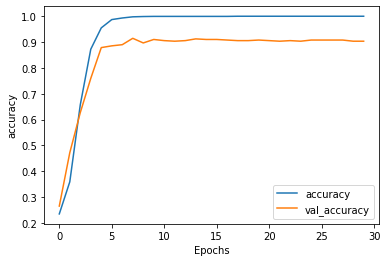

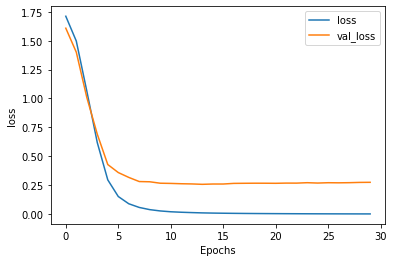

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [33]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [35]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [36]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')